In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('/content/data (2).csv')


In [ ]:
# Drop 'id' and unnamed columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)


In [ ]:
# Convert target variable to binary: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [ ]:
# Features and target
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Fit logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [ ]:
# Predict probabilities and labels
y_probs = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)


In [ ]:
# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

In [ ]:
# Print results
print("Confusion Matrix:\n", conf_matrix)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9762
Recall: 0.9535
ROC-AUC: 0.9974


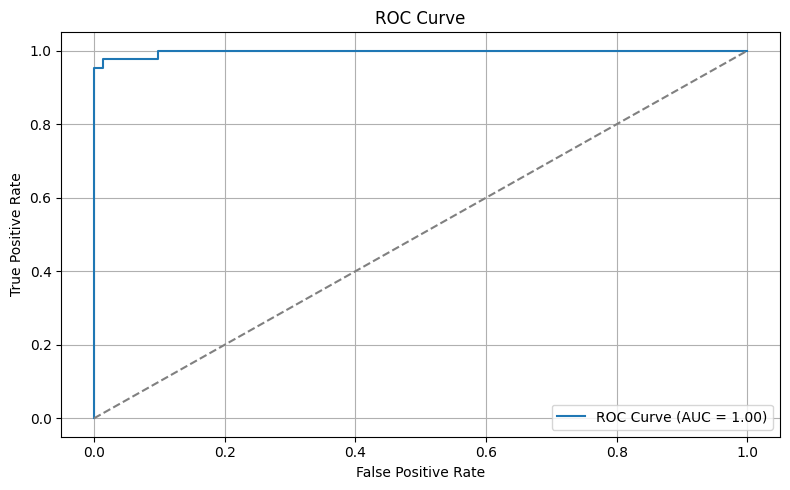

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Threshold tuning
thresholds_to_test = np.arange(0.1, 0.9, 0.1)
precision_list = []
recall_list = []

for thresh in thresholds_to_test:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    precision_list.append(precision_score(y_test, y_pred_thresh))
    recall_list.append(recall_score(y_test, y_pred_thresh))


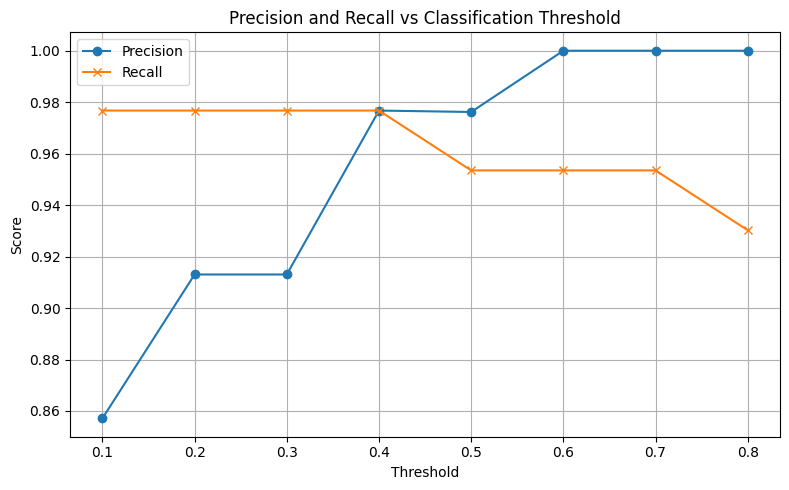

In [ ]:
# Plot precision and recall vs. threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds_to_test, precision_list, marker='o', label='Precision')
plt.plot(thresholds_to_test, recall_list, marker='x', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Classification Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()